In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading input files
train = pd.read_csv("/home/resmi/Downloads/ML/ML-PROJECT/train.csv")
test = pd.read_csv("/home/resmi/Downloads/ML/ML-PROJECT/test.csv")

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
train.shape

(54808, 14)

In [6]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
test.shape

(23490, 13)

In [8]:
train['type']='Train'

In [9]:
test['type']='Test'

In [10]:
# concatanating train and test files
data= pd.concat([train,test])

In [11]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,type
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,Train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,Train


In [12]:
data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,type
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN,Test
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN,Test
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN,Test
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN,Test
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN,Test


In [13]:
data.shape

(78298, 15)

# Preprocessing

In [14]:
#removing duplicates from a datafrome
data = data.drop_duplicates()
data.shape

(78298, 15)

In [15]:
# checking for null values
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [16]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
type                     object
dtype: object

In [17]:
# filling missing values in education column with mode
data['education'].fillna(data['education'].mode()[0], inplace=True)

In [18]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [19]:
#checking for corelation
data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005216,0.000586,0.001372,0.004420,0.000127,0.005943,-0.003930,0.001206
no_of_trainings,-0.005216,1.000000,-0.082536,-0.058439,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,0.000586,-0.082536,1.000000,0.009137,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.001372,-0.058439,0.009137,1.000000,0.001063,0.350921,0.027636,0.071813,0.159320
length_of_service,0.004420,-0.058403,0.653339,0.001063,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,0.000127,-0.043912,-0.026223,0.350921,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,-0.004818,-0.007357,0.027636,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,0.044180,-0.044592,0.071813,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


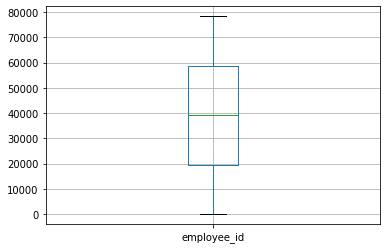

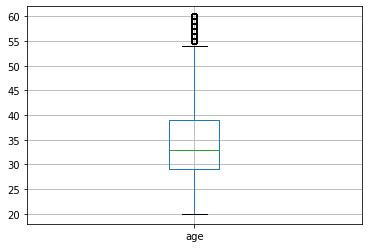

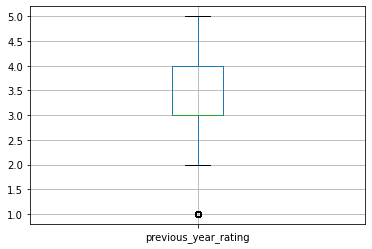

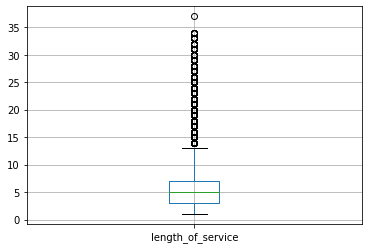

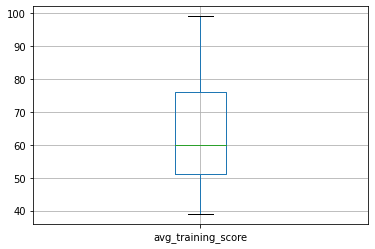

In [20]:
# checking outliers(except object and catagorical columns)
objcols=['department','region','education','gender','recruitment_channel','type','is_promoted','KPIs_met >80%','awards_won?','no_of_trainings']
for x in data:
    if x not in objcols:
        plt.figure()
        data.boxplot([x])

In [21]:
# removing outliers
for x in data:
    if x not in objcols:
        desc=data[x].describe()
        IQR=desc['75%']-desc['25%']
        UT=desc['75%']+1.5*IQR
        LT=desc['25%']-1.5*IQR
        #replacing outlier values with threshold values
        data[x][data[x] >UT] = UT
        data[x][data[x] <LT] = LT 

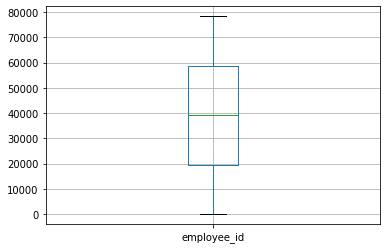

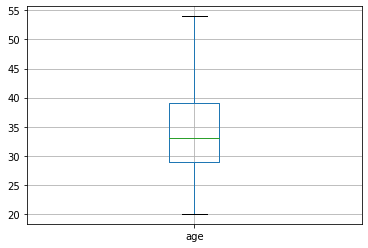

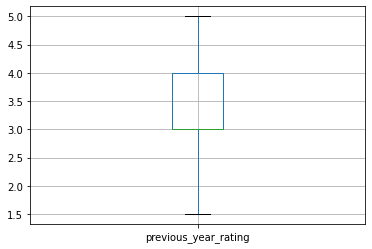

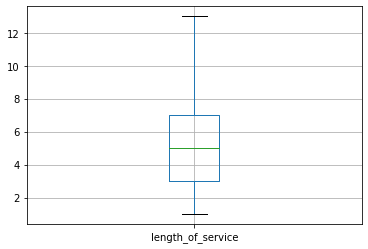

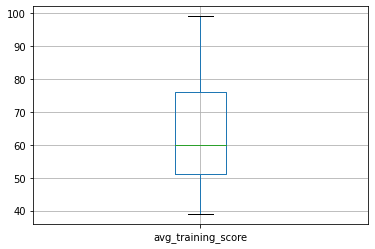

In [22]:
#after removing outliers
for x in data:
    if x not in objcols:
        plt.figure()
        data.boxplot([x])

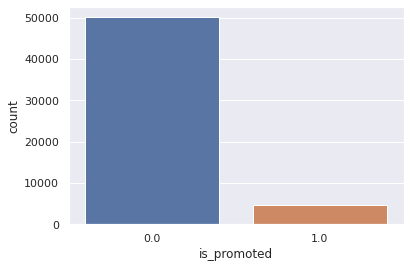

In [23]:
# checking the distribution of the output class
sns.set(style="darkgrid")
ax = sns.countplot(x="is_promoted", data=data)


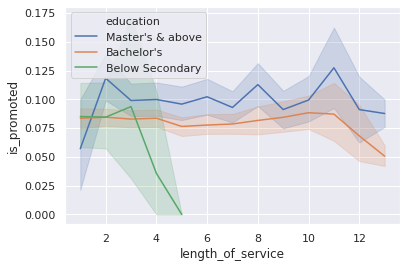

In [24]:
sns.set(style="darkgrid")
  
sns.lineplot(x="length_of_service", y="is_promoted",
             hue="education",
             data=data)



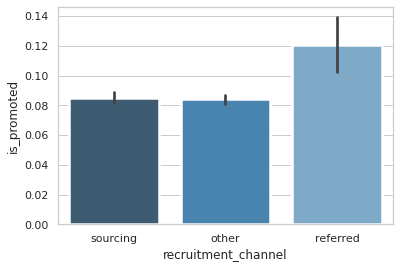

In [25]:
sns.set(style="whitegrid")
ax = sns.barplot(x="recruitment_channel", y="is_promoted",linewidth=2.5,data=data,palette="Blues_d")

In [26]:
# checking null values
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [27]:
# creating a copy of the dataset
datanew=data.copy()

In [28]:
# dropping columns that has less corelation with the output variable
datanew=datanew.drop(['employee_id','age','department','region','education','gender','recruitment_channel','type','is_promoted','awards_won?','avg_training_score'],
axis=1)

In [29]:
datanew=datanew.drop(['length_of_service','no_of_trainings'],axis=1)

In [30]:
datanew.head()

,previous_year_rating,KPIs_met >80%
0,5.0,1
1,5.0,0
2,3.0,0
3,1.5,0
4,3.0,0


In [31]:
datanew=pd.get_dummies(datanew)

In [32]:
datanew.shape

(78298, 2)

### KNN Imputer for missing values in column previous_year_rating

In [33]:
from sklearn.impute import KNNImputer

In [34]:
imputer = KNNImputer(n_neighbors=2)

In [35]:
data_filled= imputer.fit_transform(datanew)

In [36]:
type(data_filled)

numpy.ndarray

In [37]:
data_filled

array([[5., 1.],
       [5., 0.],
       [3., 0.],
       ...,
       [4., 0.],
       [4., 0.],
       [5., 1.]])

In [38]:
# filling the column with the KNN imputed values
data['previous_year_rating']=data_filled

In [39]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
type                        0
dtype: int64

In [40]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,type
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.5,10,0,0,50,0.0,Train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,Train


In [41]:
data1=data.copy()

In [42]:
data1=data1.drop(['no_of_trainings','gender','age','region','department','recruitment_channel'],axis=1)

In [43]:
data1.columns

Index(['employee_id', 'education', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'type'],
      dtype='object')

In [44]:
data1=pd.get_dummies(data1)

In [45]:
data1.tail()

,employee_id,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above,type_Test,type_Train
23485,53478,3.0,1,0,0,61,NaN,0,1,0,1,0
23486,25600,3.0,7,0,0,74,NaN,1,0,0,1,0
23487,45409,4.0,4,0,0,50,NaN,1,0,0,1,0
23488,1186,4.0,1,0,0,70,NaN,1,0,0,1,0
23489,5973,5.0,5,1,0,89,NaN,0,0,1,1,0


In [46]:
data1.shape

(78298, 12)

In [47]:
# splitting train and test values
train = data1[data1.type_Train==1]
test = data1[data1.type_Test==1]

In [48]:
train.shape

(54808, 12)

In [49]:
test.shape

(23490, 12)

In [50]:
train = train.drop(['type_Test','type_Train'],axis=1)
test = test.drop(['type_Test','type_Train'],axis=1)

In [51]:
train.shape

(54808, 10)

In [52]:
test.shape

(23490, 10)

In [53]:
y = train['is_promoted']
X = train.drop('is_promoted',axis=1)


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) #0.67 data will be for training.

In [55]:
# #LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train) #training / fitting the model

LogisticRegression()

In [57]:
y_pred=classifier.predict(X_test)

In [58]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
y_test

40907    0.0
51939    0.0
6978     0.0
12814    0.0
22921    0.0
        ... 
49375    0.0
47561    0.0
27501    0.0
17196    0.0
41130    0.0
Name: is_promoted, Length: 18087, dtype: float64

In [60]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16613,     0],
       [ 1474,     0]])

In [61]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

91.85050035937414

In [62]:
#Applying SMOTE to balance the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) 

In [63]:
y_train.value_counts()

0.0    33527
1.0     3194
Name: is_promoted, dtype: int64

In [64]:
y_res.value_counts()

1.0    33527
0.0    33527
Name: is_promoted, dtype: int64

In [65]:
y_res_nd = y_res.values

In [66]:
y_res_nd

array([0., 0., 0., ..., 1., 1., 1.])

In [67]:
# Applying logistic regression after smoting
from sklearn.linear_model import LogisticRegression
classifier_new=LogisticRegression()
classifier_new.fit(X_res,y_res) #command for training / fitting the model

LogisticRegression()

In [68]:
y_pred_new=classifier_new.predict(X_test)

In [69]:
y_pred_new

array([0., 0., 0., ..., 0., 1., 0.])

In [70]:
# confusion matrix
confusion_matrix(y_test,y_pred_new)

array([[12204,  4409],
       [  603,   871]])

In [71]:
# accuracy
accuracy_score(y_test,y_pred_new)

0.722894896887267

In [72]:
##RANDOM FOREST CLASSIFIER

In [73]:
# Applying random forest classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [74]:
from sklearn.model_selection import GridSearchCV #parameter tuning
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()


In [75]:
n_estimators=[25,50,75,100] #number of decision trees in the forest, default = 100
criterion=['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} #this will undergo 4*2*3 = 24 iterations
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100]})

In [76]:
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

In [77]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=10)

In [78]:
cls.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [80]:
y_pred=cls.predict(X_test)

In [81]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16574,    39],
       [ 1253,   221]])

In [83]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9285674794050975

In [84]:
#Model with implementation of SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) 

In [85]:
#importing Random Forest Classifier from sklearn.ensemble
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()
n_estimators=[25,50,75,100,125,150] 
criterion=['gini','entropy'] 
max_depth=[3,5,10] 
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_res,y_res)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150]})

In [86]:
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [87]:
cls=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10)
cls.fit(X_res,y_res)
y_pred=cls.predict(X_test)
# accuracy
accuracy_score(y_test,y_pred)*100

89.74401503842539

In [88]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[15794,   819],
       [ 1036,   438]])

In [89]:
#precision,Recall,F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.93844326, 0.34844869]),
 array([0.95070126, 0.29715061]),
 array([0.94453249, 0.32076163]),
 array([16613,  1474]))

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     16613
         1.0       0.35      0.30      0.32      1474

    accuracy                           0.90     18087
   macro avg       0.64      0.62      0.63     18087
weighted avg       0.89      0.90      0.89     18087



In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
rfc_probs = cls.predict_proba(X_test)
rfc_probs

array([[0.86323463, 0.13676537],
       [0.99044545, 0.00955455],
       [0.84182054, 0.15817946],
       ...,
       [0.97448418, 0.02551582],
       [0.63530257, 0.36469743],
       [0.92275885, 0.07724115]])

In [93]:
rfc_probs=rfc_probs[:,1]
rfc_probs

array([0.13676537, 0.00955455, 0.15817946, ..., 0.02551582, 0.36469743,
       0.07724115])

In [94]:
rcs_auc = roc_auc_score(y_test, rfc_probs)
rcs_auc

0.805783421804098

In [95]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results['Id']=Results.index
Results.head()

,Actual,Predicted,Id
40907,0.0,0.0,40907
51939,0.0,0.0,51939
6978,0.0,0.0,6978
12814,0.0,0.0,12814
22921,0.0,0.0,22921
